In [162]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
# import ipyparams # only in notebook, not in jupyter lab

In [26]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "total_defl_combined"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [137]:
df_dict = {}
for i, hdf in enumerate(sorted(os.listdir('data/total_defl_combined/'))):
    df = pd.read_hdf('data/total_defl_combined/{}'.format(hdf), key='seed_3')
    df_dict['df_%02d' %i] = df
    
df_dict.keys()

dict_keys(['df_00', 'df_01', 'df_02', 'df_03'])

In [138]:
E_f = [1e5, 1e4, 1e3, 1e2] # in GeV

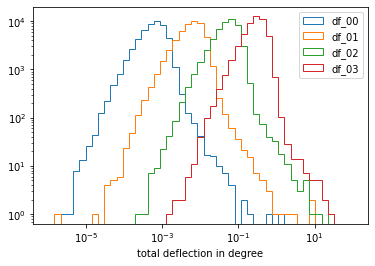

In [139]:
bins = np.logspace(-6, 2, 50)
for d in df_dict:
    df = df_dict[d]
    plt.hist(df.deflection, bins=bins, histtype='step', label=d)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('total deflection in degree')
plt.legend()

argmax:  25
number events:  10000
Current CL:  0.7245
maxixum:  3.1
lower:  2.0
upper:  4.0
max =  3.1  -  1.1  +  0.8999999999999999


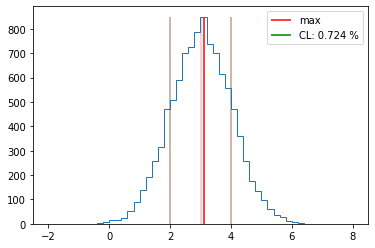

In [159]:
# get 95% smallest interval around the modal 
def get_smallest_interval_around_mode(values, bins, CL=0.68, show=False, plot=False):
    '''Determines smallest interval of x percent located around the modal value.
       Fine binnig results to more precise results.
    
    '''
    binned_counts, bin_edges = np.histogram(values, bins=bins)
    arg_max = np.argmax(binned_counts)
    n_sum = np.sum(binned_counts)
    n_sorted = np.sort(binned_counts)[::-1]
    n_argsort = np.argsort(binned_counts)[::-1]
    c = 0
    for id_argsort,i,counts in zip(range(len(n_argsort)), n_argsort, n_sorted):
        c += counts
        if c/n_sum >= CL:
            c_level = np.round(c/n_sum, 3)
            if i < arg_max: # lower limit
                # print('i < argmax')
                lower = bin_edges[i]
                while i < arg_max:
                    id_argsort += 1
                    i = n_argsort[id_argsort]
                upper = bin_edges[i]
            elif i > arg_max: 
                # print('i > argmax')
                upper = bin_edges[i]
                while i > arg_max:
                    id_argsort -= 1
                    i = n_argsort[id_argsort]
                lower = bin_edges[i]
            else:
                print('ERROR: i == argmax')
            break
    
    maximum = (bin_edges[arg_max] + bin_edges[arg_max + 1])/2
    cl = {
        'maximum': maximum,
        'lower_bound': lower,
        'upper_bound': upper,
        'CL': c_level,
    }        
    if show:
        print('argmax: ', arg_max)
        print('number events: ', np.sum(binned_counts))
        print('Current CL: ', c/n_sum)
        print('maxixum: ', maximum)
        print('lower: ', lower)
        print('upper: ', upper)
        print('max = ', maximum, ' - ', maximum-lower, ' + ',upper-maximum)
    if plot:
        plt.vlines(cl['maximum'], 1, np.max(binned_counts), color='red', label='max')
        plt.vlines(cl['lower_bound'], 1, np.max(binned_counts), color='green')
        plt.vlines(cl['upper_bound'], 1, np.max(binned_counts), color='green', label='CL: {} %'.format(cl['CL']))

    return cl

gaus = np.random.normal(3, size=10000)
bins = np.linspace(-2, 8, 51)
plt.hist(gaus, bins=bins, histtype='step')
si = get_smallest_interval_around_mode(gaus, bins=bins, CL=0.68, show=True, plot=True)

plt.vlines(np.quantile(gaus, 0.155), 0, 850, color='pink')
plt.vlines(np.quantile(gaus, 0.5), 0, 850, color='pink')
plt.vlines(np.quantile(gaus, 0.835), 0, 850, color='pink')
plt.legend()

argmax:  35
number events:  50000
Current CL:  0.72826
maxixum:  0.0007422729482823851
lower:  0.00026560877829466864
upper:  0.0014174741629268063
max =  0.0007422729482823851  -  0.00047666416998771646  +  0.0006752012146444212
argmax:  48
number events:  50000
Current CL:  0.72872
maxixum:  0.008338130418350593
lower:  0.0024770763559917113
upper:  0.013219411484660314
max =  0.008338130418350593  -  0.005861054062358881  +  0.004881281066309721
argmax:  59
number events:  50000
Current CL:  0.71734
maxixum:  0.06455911564387659
lower:  0.02782559402207126
upper:  0.10235310218990269
max =  0.06455911564387659  -  0.036733521621805335  +  0.0377939865460261
argmax:  68
number events:  50000
Current CL:  0.71958
maxixum:  0.34453258282403565
lower:  0.14849682622544666
upper:  0.5462277217684348
max =  0.34453258282403565  -  0.196035756598589  +  0.20169513894439917


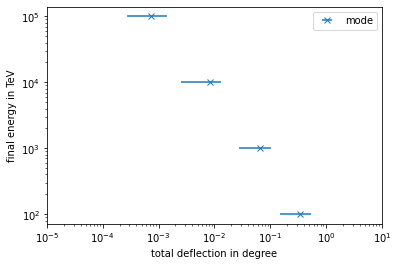

In [157]:
bins = np.logspace(-6, 2, 100)

deflection_mode = []
deflection_mode_lower = []
deflection_mode_upper = []
for d in df_dict: # ['df_00']:
    df = df_dict[d]
    si = get_smallest_interval_around_mode(df.deflection, bins=bins, CL=0.68, show=True, plot=False)
    # plt.hist(df.deflection, bins=bins, histtype='step', label=d)
    
    deflection_mode.append(si['maximum'])
    deflection_mode_lower.append(si['maximum'] - si['lower_bound'])
    deflection_mode_upper.append(si['upper_bound'] - si['maximum'])

plt.errorbar(deflection_mode, E_f, xerr=(deflection_mode_lower, deflection_mode_upper), fmt='x', label='mode')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('total deflection in degree')
plt.ylabel('final energy in TeV')
plt.xlim(1e-5, 10)
plt.legend()

argmax:  35
number events:  50000
Current CL:  0.95368
maxixum:  0.0007422729482823851
lower:  8.697490026177834e-05
upper:  0.0020565123083486534
max =  0.0007422729482823851  -  0.0006552980480206067  +  0.0013142393600662683
argmax:  48
number events:  50000
Current CL:  0.95656
maxixum:  0.008338130418350593
lower:  0.0008111308307896872
upper:  0.019179102616724886
max =  0.008338130418350593  -  0.007526999587560906  +  0.010840972198374293
argmax:  59
number events:  50000
Current CL:  0.95942
maxixum:  0.06455911564387659
lower:  0.007564633275546291
upper:  0.1788649529057435
max =  0.06455911564387659  -  0.0569944823683303  +  0.11430583726186691
argmax:  68
number events:  50000
Current CL:  0.95244
maxixum:  0.34453258282403565
lower:  0.058570208180566734
upper:  0.7924828983539186
max =  0.34453258282403565  -  0.2859623746434689  +  0.44795031552988296


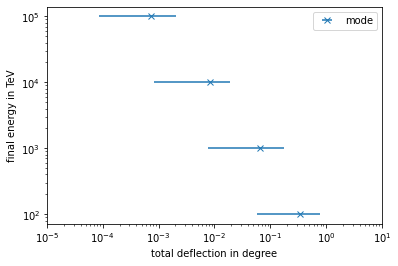

In [155]:
bins = np.logspace(-6, 2, 100)

deflection_mode = []
deflection_mode_lower = []
deflection_mode_upper = []
for d in df_dict: # ['df_00']:
    df = df_dict[d]
    si = get_smallest_interval_around_mode(df.deflection, bins=bins, CL=0.95, show=True, plot=False)
    # plt.hist(df.deflection, bins=bins, histtype='step', label=d)
    
    deflection_mode.append(si['maximum'])
    deflection_mode_lower.append(si['maximum'] - si['lower_bound'])
    deflection_mode_upper.append(si['upper_bound'] - si['maximum'])

plt.errorbar(deflection_mode, E_f, xerr=(deflection_mode_lower, deflection_mode_upper), fmt='x', label='mode')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('total deflection in degree')
plt.ylabel('final energy in TeV')
plt.xlim(1e-5, 10)
plt.legend()

argmax:  35
number events:  50000
Current CL:  0.95368
maxixum:  0.0007422729482823851
lower:  8.697490026177834e-05
upper:  0.0020565123083486534
max =  0.0007422729482823851  -  0.0006552980480206067  +  0.0013142393600662683


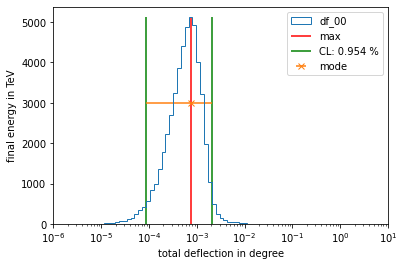

In [152]:
bins = np.logspace(-6, 2, 100)

deflection_mode = []
deflection_mode_lower = []
deflection_mode_upper = []
for d in ['df_00']:
    df = df_dict[d]
    # si = get_smallest_interval_around_mode(df.deflection, bins=bins, CL=0.3, show=True, plot=True)
    si = get_smallest_interval_around_mode(df.deflection, bins=bins, CL=0.95, show=True, plot=True)
    plt.hist(df.deflection, bins=bins, histtype='step', label=d)
    
    deflection_mode.append(si['maximum'])
    deflection_mode_lower.append(si['maximum'] - si['lower_bound'])
    deflection_mode_upper.append(si['upper_bound'] - si['maximum'])

plt.errorbar(deflection_mode, 3000, xerr=(deflection_mode_lower, deflection_mode_upper), fmt='x', label='mode')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('total deflection in degree')
plt.ylabel('final energy in TeV')
plt.xlim(1e-6, 10)
plt.legend()

/home/pgutjahr/proposal_env/lib64/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


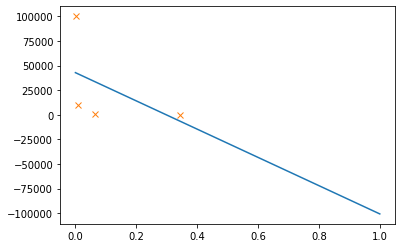

In [174]:
### fit deflection modes 
def efit(x, a, b, c):
    return a * np.exp(-b * x) + c


params, cov = curve_fit(efit, deflection_mode, E_f)
errors = np.sqrt(np.diag(cov))

x = np.logspace(-4, 0, 100)
plt.plot(x, efit(x, *params))
plt.plot(deflection_mode, E_f, 'x')
# plt.xscale('log')
# plt.yscale('log')